# Customer Segmentation



### Machine Learning II Project

   - Bruno Moreira            | 20211574@novaims.unl.pt
   - Carolina Braziel Shaul   | 20211557@novaims.unl.pt
   - Madalena Dias Frango     | 20211522@novaims.unl.pt

## Table of Contents

<br>
[2.4. Data Adjustments](#2.4.-bullet)<br>
<br>
[2.5. K-Means](#2.5.-bullet)<br>
<br>
[2.5.1. Solution 1](#2.5.1.-bullet)<br>
<br>
[2.5.2. Solution 2](#2.5.2.-bullet)<br>
<br>
[2.5.3. Solution 3](#2.5.3.-bullet)<br>

<br>

---
<br>

<br>

---
<br>

<a class="anchor" id="1-bullet">     
    

### 1. Importing Data & Libraries 

</a>


In [11]:
#Basic Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


#Plot Maps
import folium
from folium.plugins import HeatMap, MarkerCluster 

#Functions
import Functions

# Umap library
import umap

%load_ext autoreload
%autoreload 2

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
individuals = pd.read_csv('clientes_preprocessed.csv')
transactions = pd.read_csv('Customer Basket Dataset.csv')
prod_mapping = pd.read_excel('Product Mapping Excel File.xlsx')

In [13]:
individuals.set_index('customer_id', inplace=True)

<br>

---
<br>

<a class="anchor" id="2.4.-bullet">     
    

### 2.4. Data Adjustments

</a>

#### Joining Features

In [14]:
individuals['lifetime_spend_animal_protein'] = individuals[['lifetime_spend_fish', 'lifetime_spend_meat']].sum(axis=1)
individuals['lifetime_spend_technology'] = individuals[['lifetime_spend_videogames', 'lifetime_spend_electronics']].sum(axis=1)

In [15]:
corr_matrix = individuals.drop(['lifetime_spend_fish', 'lifetime_spend_meat', 'lifetime_spend_videogames', 'lifetime_spend_electronics'], axis = 1).corr()
Functions.get_high_correlations(corr_matrix, 0.66)

,Variable 1,Variable 2,Correlation
10,lifetime_total_distinct_products,lifetime_spend_animal_protein,0.932928
3,lifetime_spend_groceries,lifetime_total_distinct_products,0.926119
2,distinct_stores_visited,percentage_of_products_bought_promotion,0.923021
6,lifetime_spend_groceries,lifetime_spend_animal_protein,0.915666
5,lifetime_spend_groceries,total_lifetime_spend,0.913175
0,kids_home,minors_in_household,0.895671
11,total_lifetime_spend,lifetime_spend_animal_protein,0.872337
9,lifetime_total_distinct_products,total_lifetime_spend,0.855891
1,teens_home,minors_in_household,0.799848
7,lifetime_spend_nonalcohol_drinks,lifetime_spend_technology,0.787628


In [16]:
continuous = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction', 'total_lifetime_spend', 'age', 'birthday' ]

#Variaveis tais como 'lifetime_total_distinct_products', 'year_first_transaction', 
#  'age', 'birthday', estão a ser tratadas como continuas neste contexto dada a amplitude delas.

discrete = ['kids_home', 'teens_home', 'typical_hour', 'birthmonth',
       'number_complaints', 'distinct_stores_visited', 'minors_in_household', 'education']

binary = ['customer_gender', 'loyalty_card']

#### Data Scalling

In [17]:
scaler = MinMaxScaler()
individuals_num = individuals.drop(['customer_name', 'region'], axis=1)
scaled_data = scaler.fit_transform(individuals_num)
scaled_data = pd.DataFrame(scaled_data, index= individuals_num.index, columns=individuals_num.columns)

<br>

---
<br>

<a class="anchor" id="2.5.-bullet">     
    

### 2.5. K-Means

</a>

> Selecting the columns to use to plot by

In [18]:
columns = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables',
 'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 'lifetime_spend_hygiene',
 'lifetime_spend_videogames', 'lifetime_total_distinct_products', 'percentage_of_products_bought_promotion',
 'year_first_transaction', 'total_lifetime_spend', 'age', 'kids_home', 'teens_home',
 'typical_hour', 'number_complaints','distinct_stores_visited', 'minors_in_household']

In [19]:
colors = ['#F29687','#5D64AC','#EFD56C','#B5699C','#569F6E']

<a class="anchor" id="2.5.3.-bullet">     
    

#### 2.5.3. Solution 3
</a>

Esta solução é caracterizada por utilizar as seguintes variaveis para segmentação em SEIS (6) clusters:

> 'customer_gender', 'kids_home', 'teens_home', 'number_complaints',
       'distinct_stores_visited', 'lifetime_spend_groceries', 'typical_hour',
       'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks',
       'lifetime_spend_alcohol_drinks', 'lifetime_spend_hygiene',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card', 'latitude_encoded', 'longitude_encoded',
       'total_lifetime_spend', 'minors_in_household', 'age', 'education',
       'lifetime_spend_animal_protein', 'lifetime_spend_technology'

In [20]:
fit_variables = ['customer_gender', 'kids_home', 'teens_home', 'number_complaints',
       'distinct_stores_visited', 'lifetime_spend_groceries', 'typical_hour',
       'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks',
       'lifetime_spend_alcohol_drinks', 'lifetime_spend_hygiene',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card', 'latitude_encoded', 'longitude_encoded',
       'total_lifetime_spend', 'minors_in_household', 'age', 'education',
       'lifetime_spend_animal_protein', 'lifetime_spend_technology']

##### Fitting the Model

In [21]:
kmeans_sol3 = KMeans(n_clusters=6, random_state=0).fit(scaled_data[fit_variables])
individuals['cluster_kmeans3'] =  kmeans_sol3.predict(scaled_data[fit_variables])

##### Analyzing the Results

In [22]:
individuals.groupby('cluster_kmeans3')['customer_gender'].count()

cluster_kmeans3
0    5173
1    4740
2    4610
3    4714
4    5616
5    4921
Name: customer_gender, dtype: int64

In [23]:
Functions.compare_clusters(individuals, 'cluster_kmeans3')

,0,1,2,3,4,5,general_mean
customer_gender,0.506089,0.489873,0.494143,0.496818,0.499644,0.491567,0.496574
kids_home,2.303886,1.158228,0.689588,1.542639,0.288462,1.000203,1.155404
teens_home,1.236227,0.770886,0.068547,0.711922,0.235577,0.069904,0.516827
number_complaints,1.159482,0.311181,0.500000,1.221468,0.431268,1.010567,0.770169
distinct_stores_visited,4.849990,2.000000,1.992625,6.031396,2.275819,20.001829,6.159636
lifetime_spend_groceries,8674.426445,996.438397,200.406291,11255.840899,2544.109509,302.959764,4008.813629
lifetime_spend_electronics,200.217089,51.616667,4999.557484,276.637251,574.442664,20.000000,972.556727
typical_hour,15.418713,9.963080,20.951844,14.179678,17.076211,8.991668,14.461107
lifetime_spend_vegetables,674.933501,1495.472363,20.033623,702.553458,260.710826,300.231863,568.474340
lifetime_spend_nonalcohol_drinks,901.736323,20.935232,1500.946855,851.244166,300.483262,300.431823,633.505206


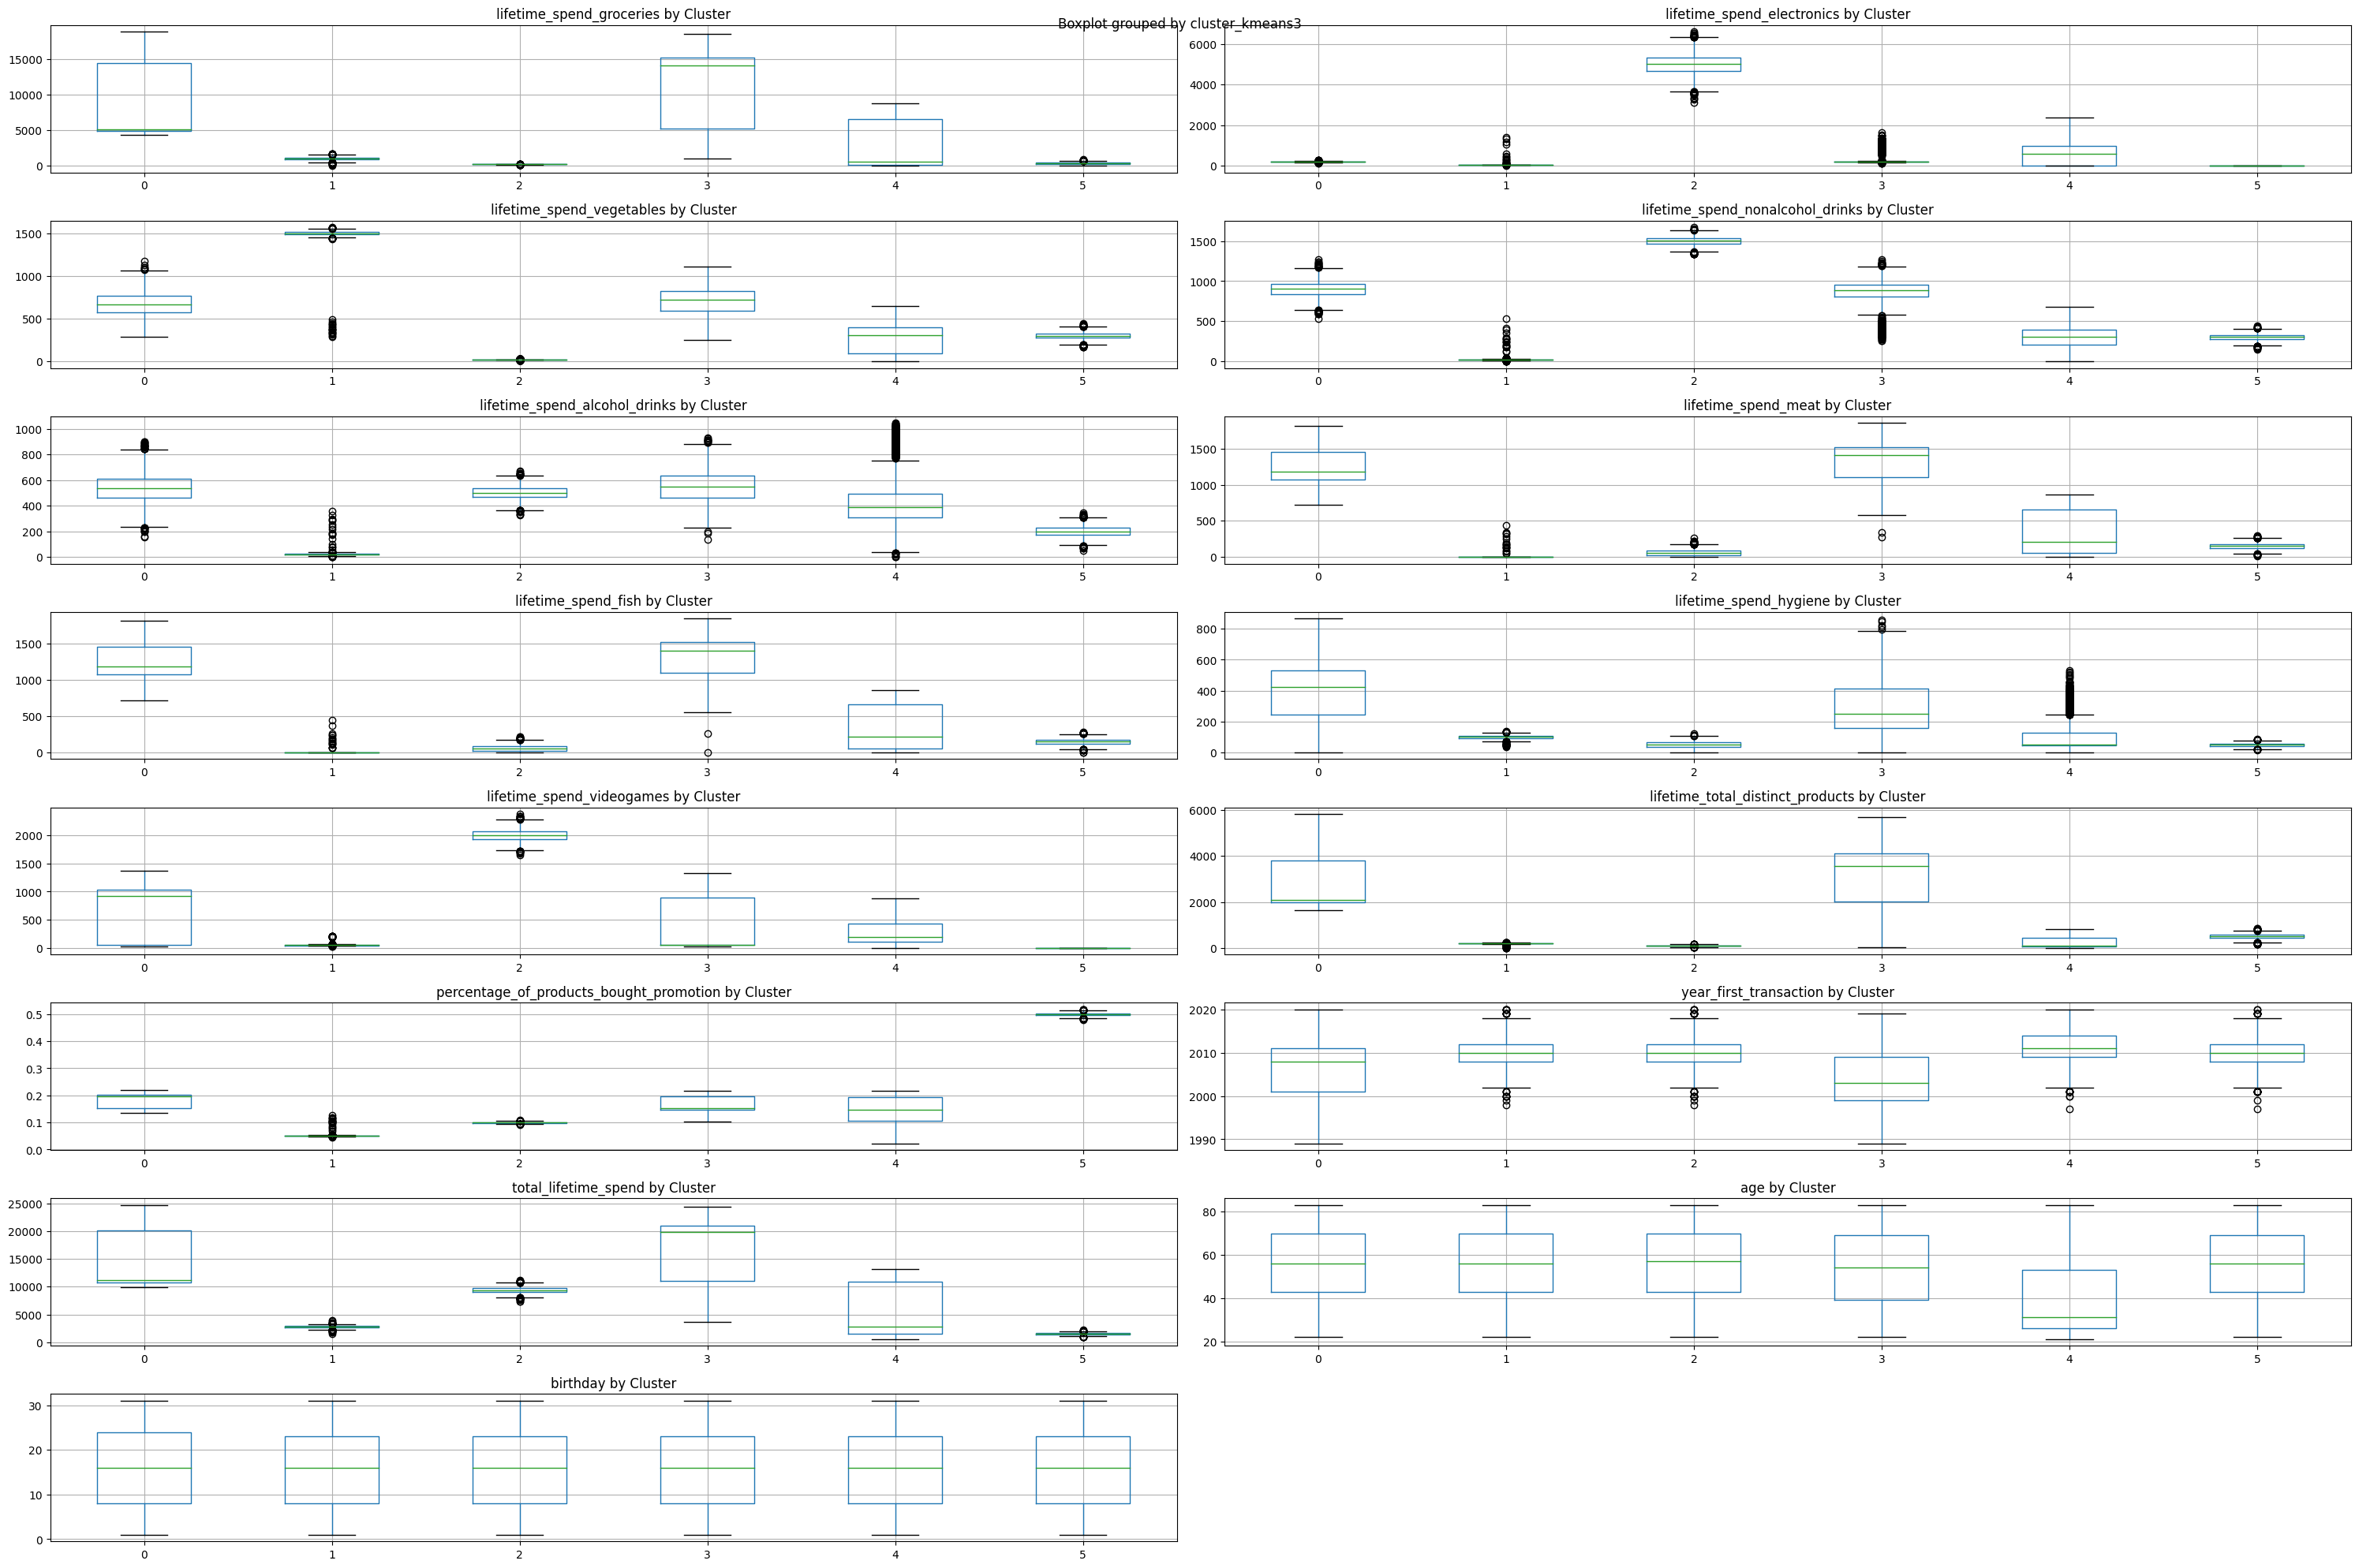

In [15]:
fig, axs = plt.subplots(12, 2, figsize=(30, 30))

    # Flatten the axs array for easy indexing
axs = axs.flatten()

for i, column in enumerate(continuous):
    ax = axs[i]
    individuals.boxplot(column=column, by='cluster_kmeans3', ax=ax)
    ax.set_xlabel('')
    ax.set_title(column + ' by Cluster')

for i in range(len(axs)):
    if i >= len(continuous):
        axs[i].set_visible(False)

    # Adjust spacing between subplots
fig.tight_layout()

    # Show the plot
plt.show()

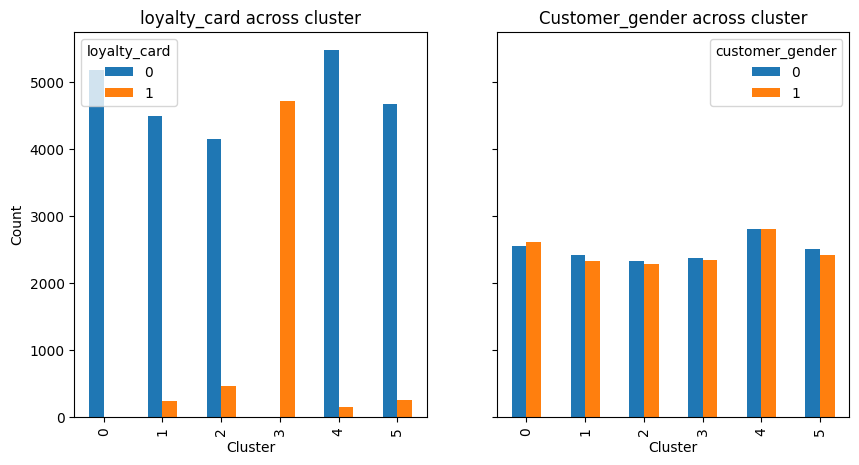

In [16]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

individuals.groupby('cluster_kmeans3')['loyalty_card'].value_counts().unstack().plot(kind='bar', ax=axs[0])

# Set axis labels and title for the first subplot
axs[0].set_xlabel('Cluster')
axs[0].set_ylabel('Count')
axs[0].set_title('loyalty_card across cluster')

individuals.groupby('cluster_kmeans3')['customer_gender'].value_counts().unstack().plot(kind='bar', ax=axs[1])

# Set axis labels and title for the second subplot
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Count')
axs[1].set_title('Customer_gender across cluster')

# Show the plot
plt.show()

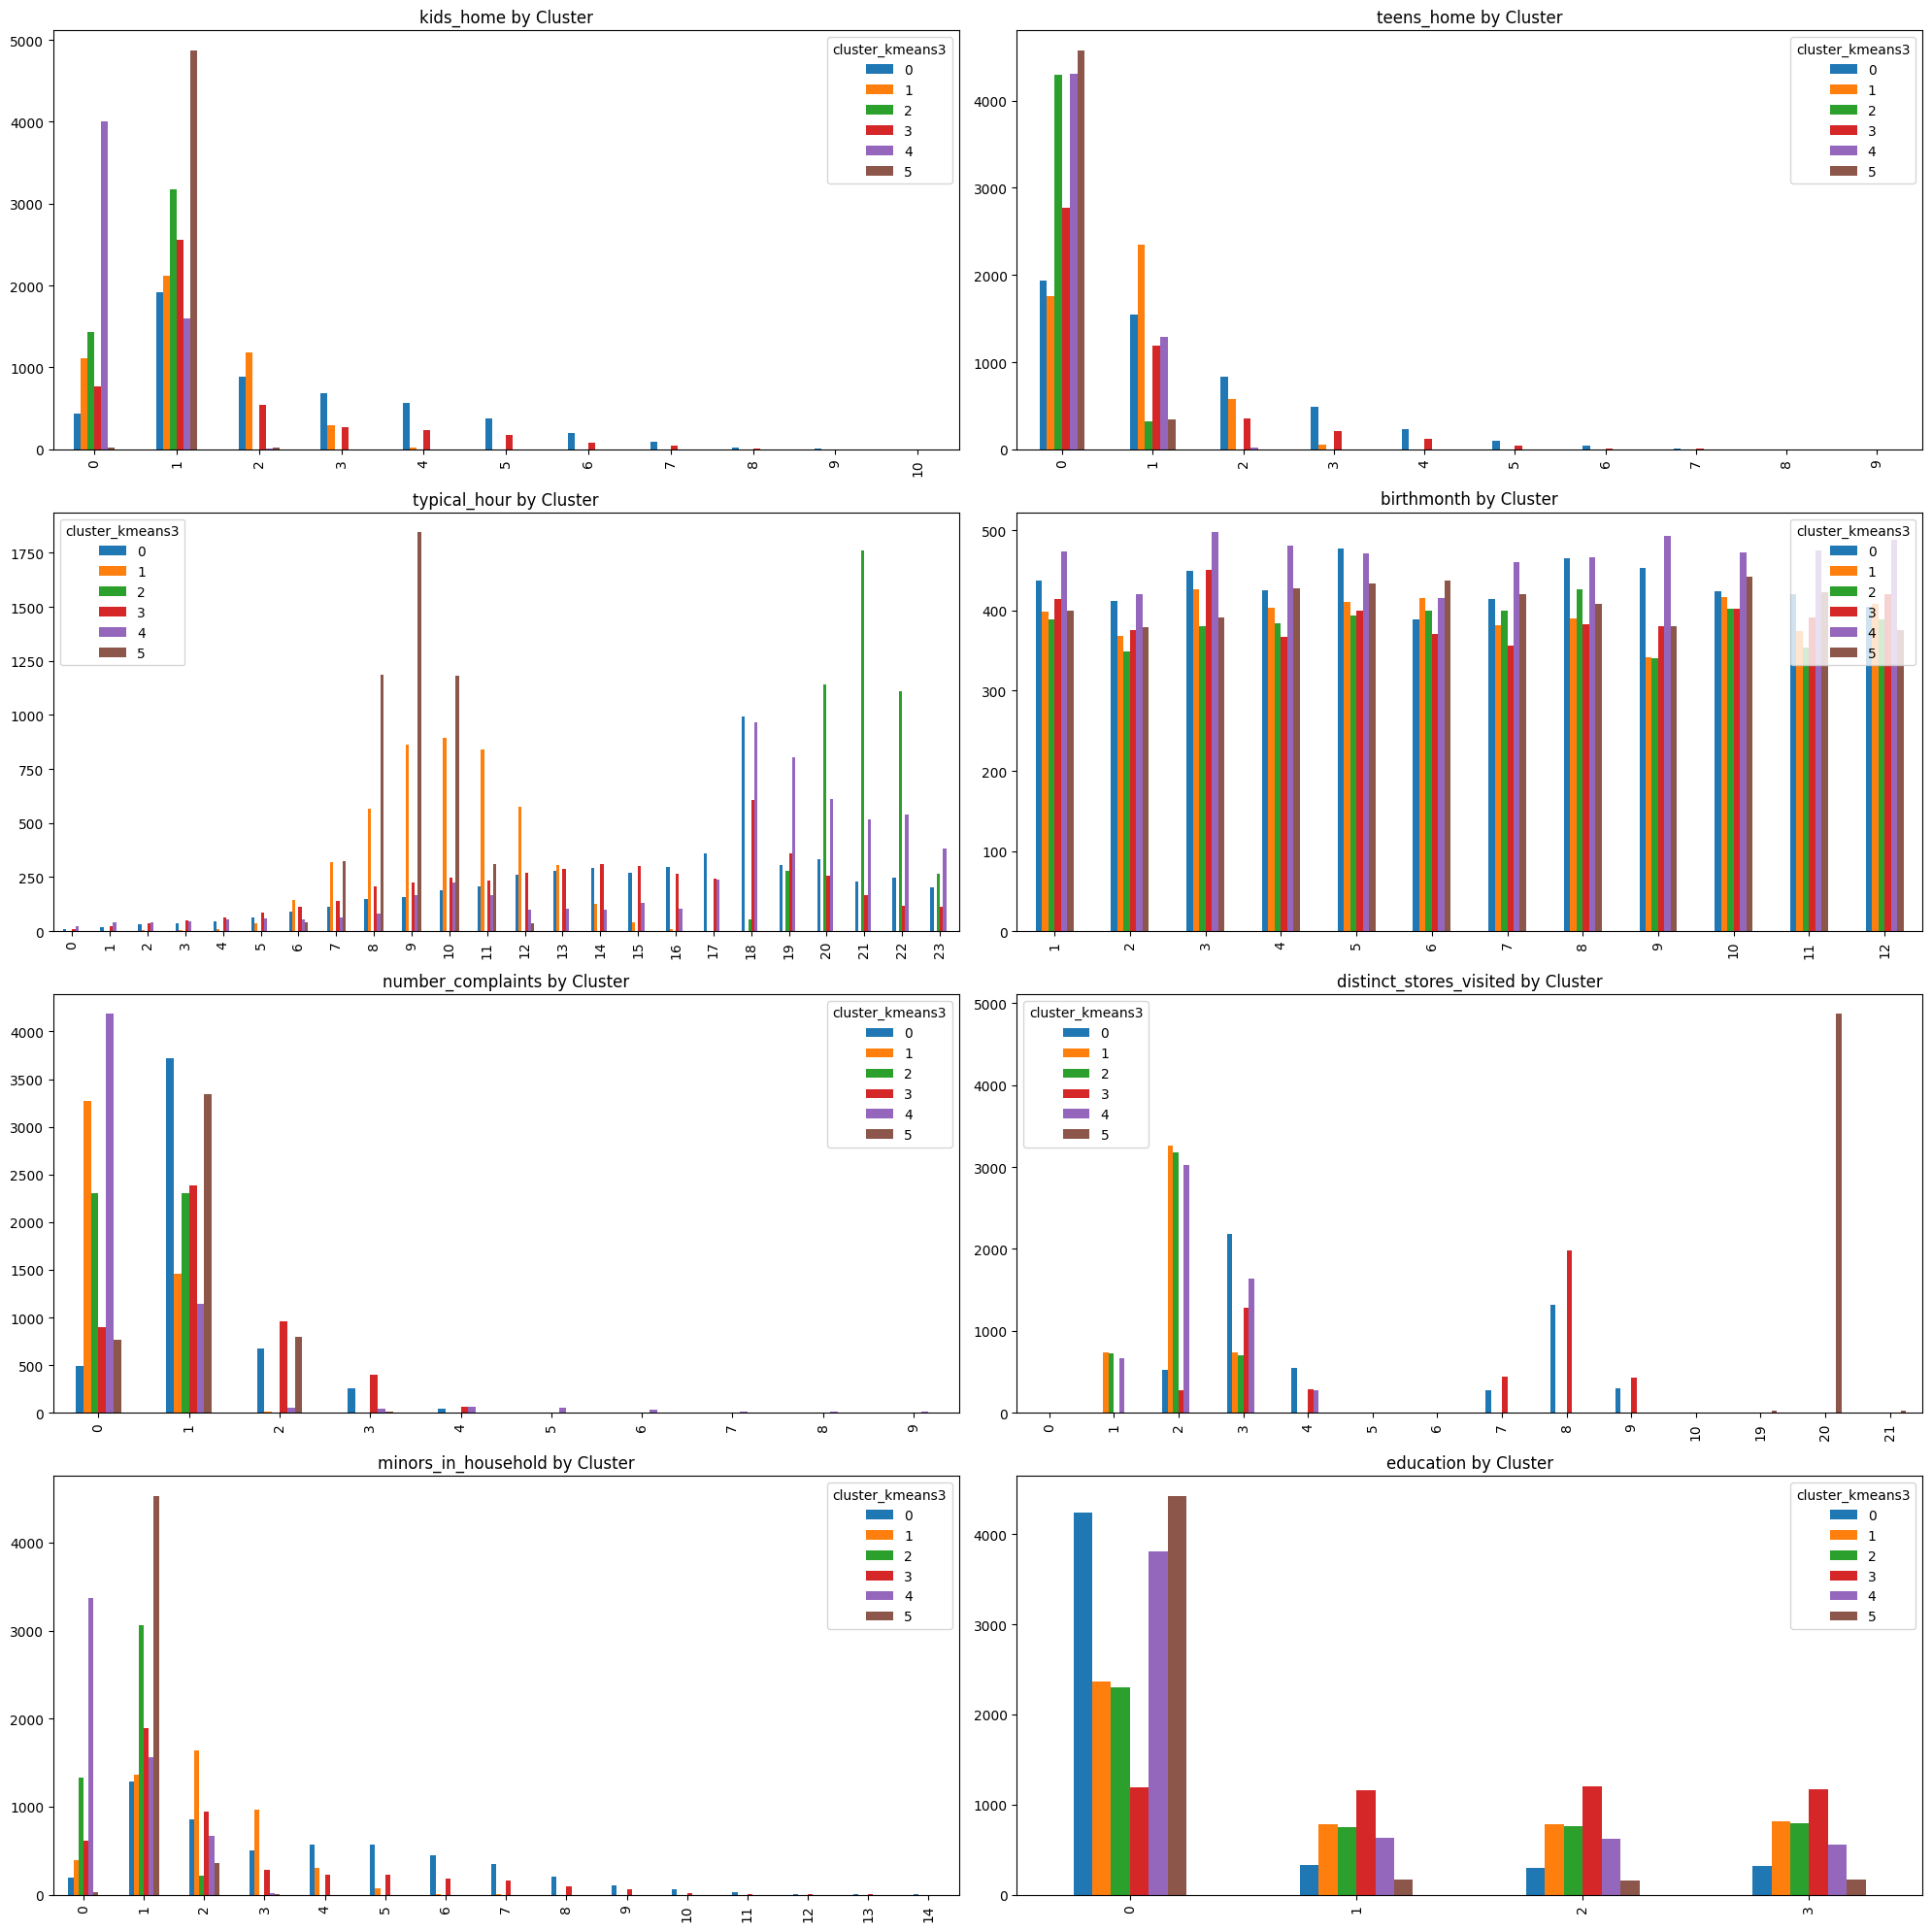

In [17]:
#HELP!!! PRECISO DE UMA ALTERNATIVA A ESTE PESSIMO GRAFICO
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

    # Flatten the axs array for easy indexing
axs = axs.flatten()

for i, column in enumerate(discrete):
    ax = axs[i]
    individuals.groupby(column)['cluster_kmeans3'].value_counts().unstack().plot(kind='bar', ax=ax)
    ax.set_xlabel('')
    ax.set_title(column + ' by Cluster')

for i in range(len(axs)):
    if i >= len(discrete):
        axs[i].set_visible(False)

    # Adjust spacing between subplots
fig.tight_layout()

    # Show the plot
plt.show()

In [18]:
colors = ['#F29687','#5D64AC','#EFD56C','#B5699C','#569F6E', '#1C003B']

KeyError: 'cluster_kmeans3'

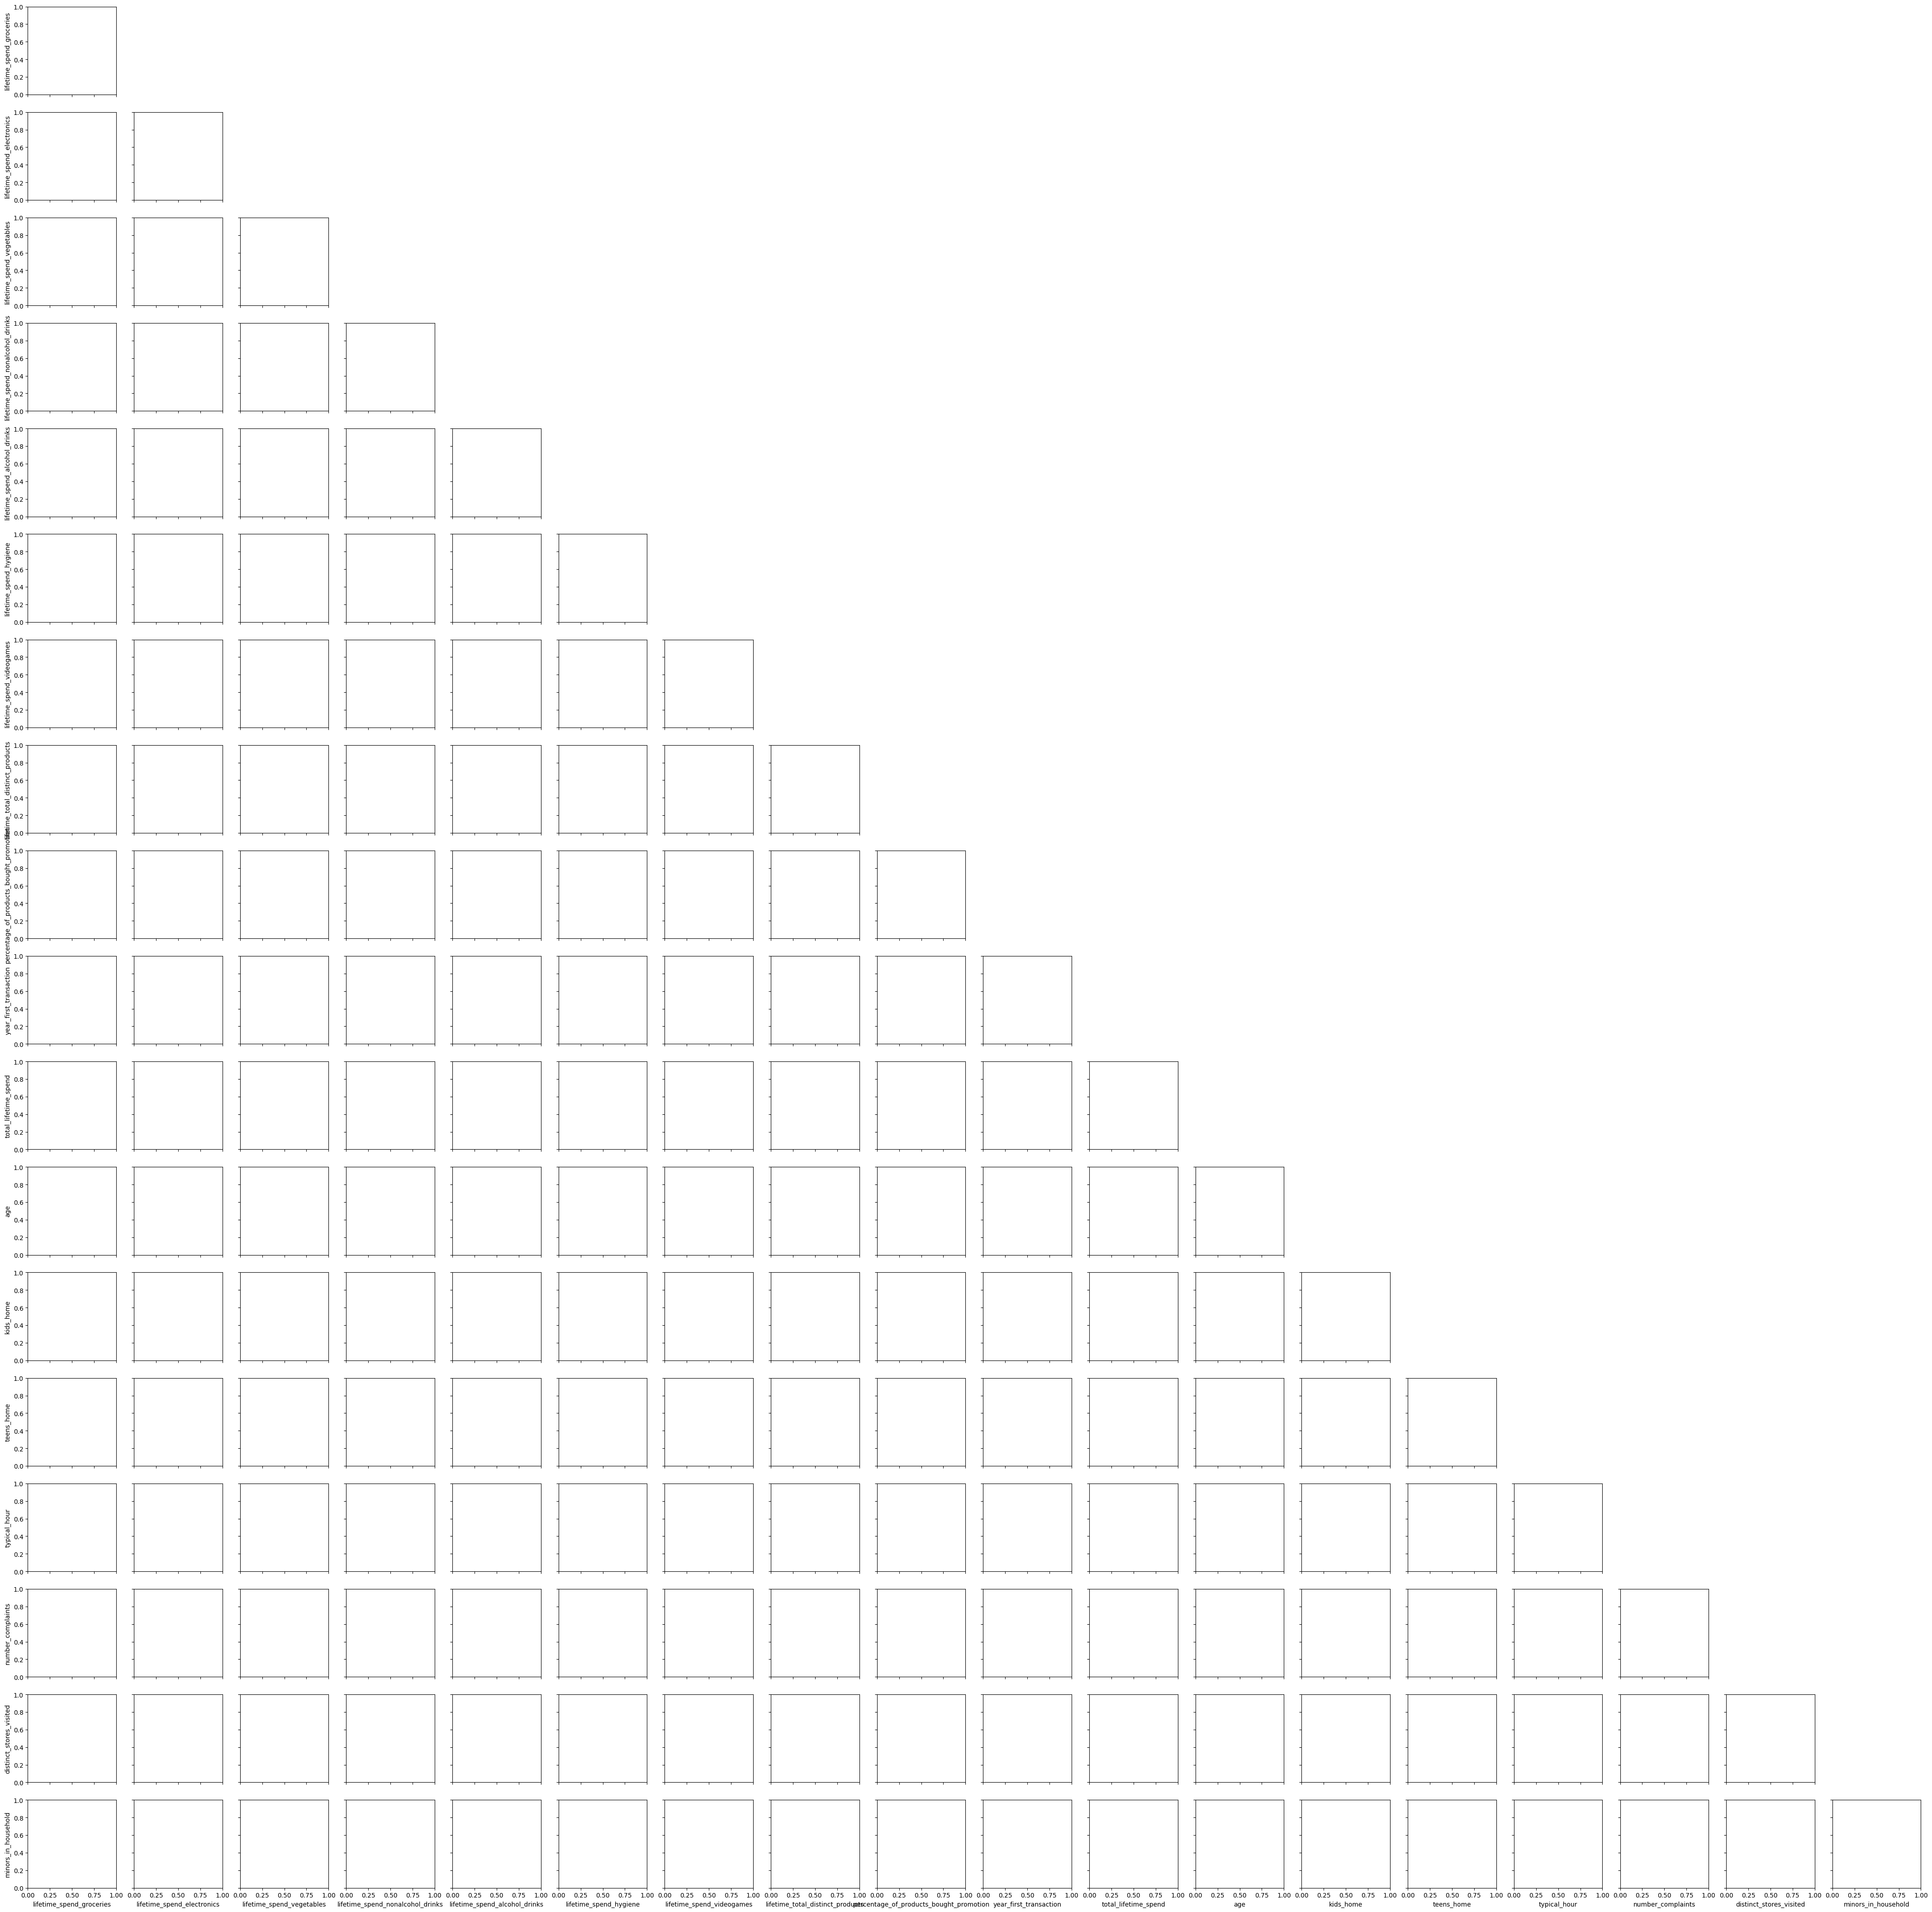

In [19]:
sns.pairplot(individuals[columns], hue = "cluster_kmeans3", kind = 'scatter', diag_kind = 'hist', corner = True, plot_kws = dict(alpha = 0.4), diag_kws=dict(fill=False), size = 3, palette = colors)

<a class="anchor" id="2.5.3.-bullet">     
    

#### 2.5.Z. Solution Z
</a>

In [24]:
fit_variables = ['kids_home', 'teens_home', 'number_complaints',
 'distinct_stores_visited', 'lifetime_spend_groceries', 'typical_hour',
 'lifetime_spend_vegetables','lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks',
 'lifetime_spend_hygiene','lifetime_total_distinct_products','percentage_of_products_bought_promotion',
 'year_first_transaction','loyalty_card','total_lifetime_spend','age',
 'education','lifetime_spend_animal_protein','lifetime_spend_videogames', 'lifetime_spend_electronics']

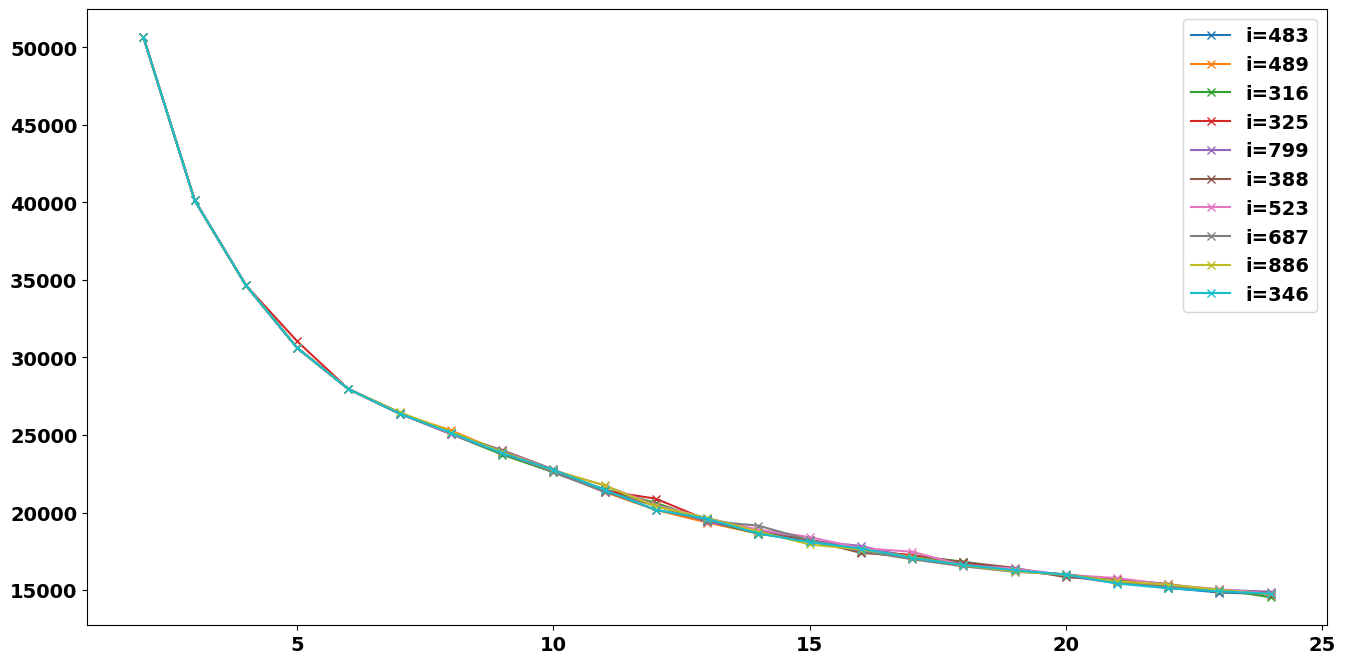

In [25]:
Functions.plot_inertia(scaled_data, 25, 10)

In [26]:
kmeans_solZ = KMeans(n_clusters=6, random_state=0).fit(scaled_data)
individuals['cluster_kmeansZ'] =  kmeans_solZ.predict(scaled_data)

In [27]:
Functions.compare_clusters(individuals, 'cluster_kmeansZ')

,0,1,2,3,4,5,general_mean
customer_gender,0.489873,0.502143,0.494143,0.499790,0.491567,0.500535,0.496574
kids_home,1.158017,0.277778,0.689588,0.997901,1.000203,3.075540,1.155404
teens_home,0.771308,0.218101,0.068547,0.271620,0.069904,1.809330,0.516827
number_complaints,0.311181,0.400923,0.500000,1.551008,1.010567,0.932377,0.770169
distinct_stores_visited,1.999578,2.330861,1.992625,7.999580,20.001829,3.007704,6.159636
lifetime_spend_groceries,996.823840,2873.138312,200.406291,14993.307935,302.959764,4999.391825,4008.813629
lifetime_spend_electronics,51.522574,605.672601,4999.557484,199.970403,20.000000,201.078108,972.556727
typical_hour,9.963291,17.213155,20.951844,11.914568,8.991668,17.403595,14.461107
lifetime_spend_vegetables,1495.537764,271.218595,20.033623,799.560034,300.231863,601.924674,568.474340
lifetime_spend_nonalcohol_drinks,20.985865,307.760303,1500.946855,900.786104,300.431823,900.171624,633.505206


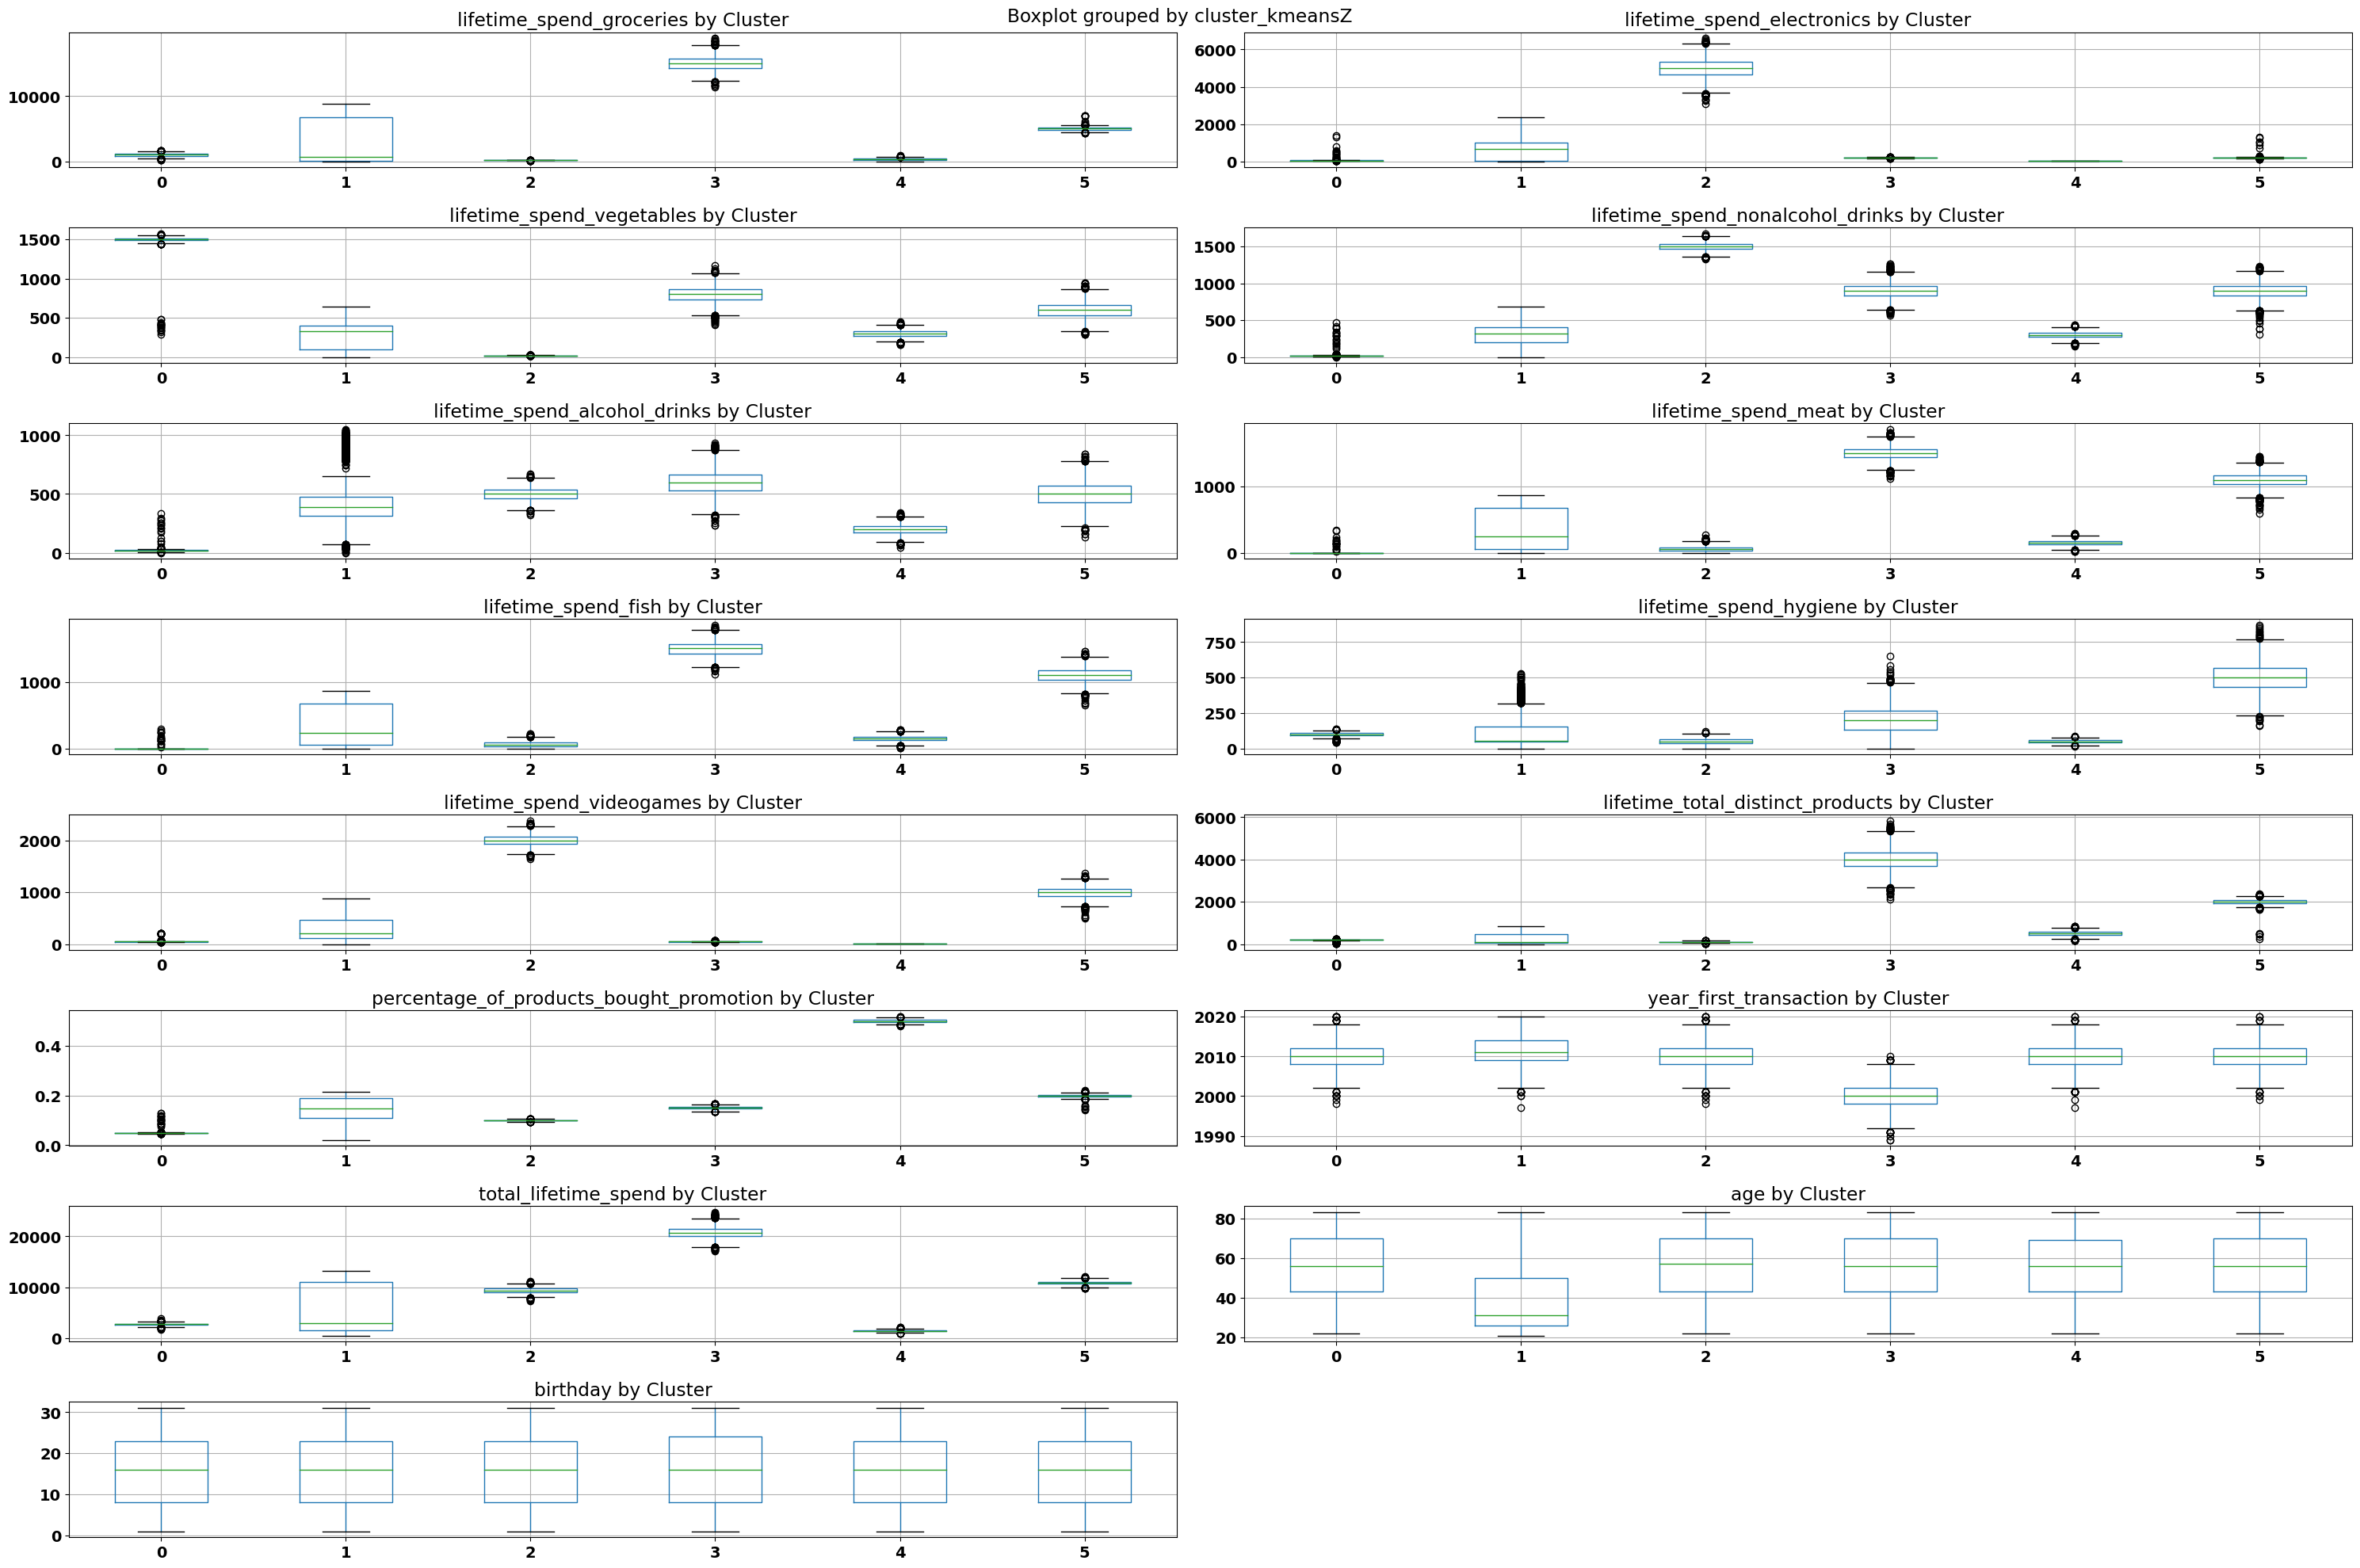

In [28]:
fig, axs = plt.subplots(12, 2, figsize=(30, 30))

    # Flatten the axs array for easy indexing
axs = axs.flatten()

for i, column in enumerate(continuous):
    ax = axs[i]
    individuals.boxplot(column=column, by='cluster_kmeansZ', ax=ax)
    ax.set_xlabel('')
    ax.set_title(column + ' by Cluster')

for i in range(len(axs)):
    if i >= len(continuous):
        axs[i].set_visible(False)

    # Adjust spacing between subplots
fig.tight_layout()

    # Show the plot
plt.show()

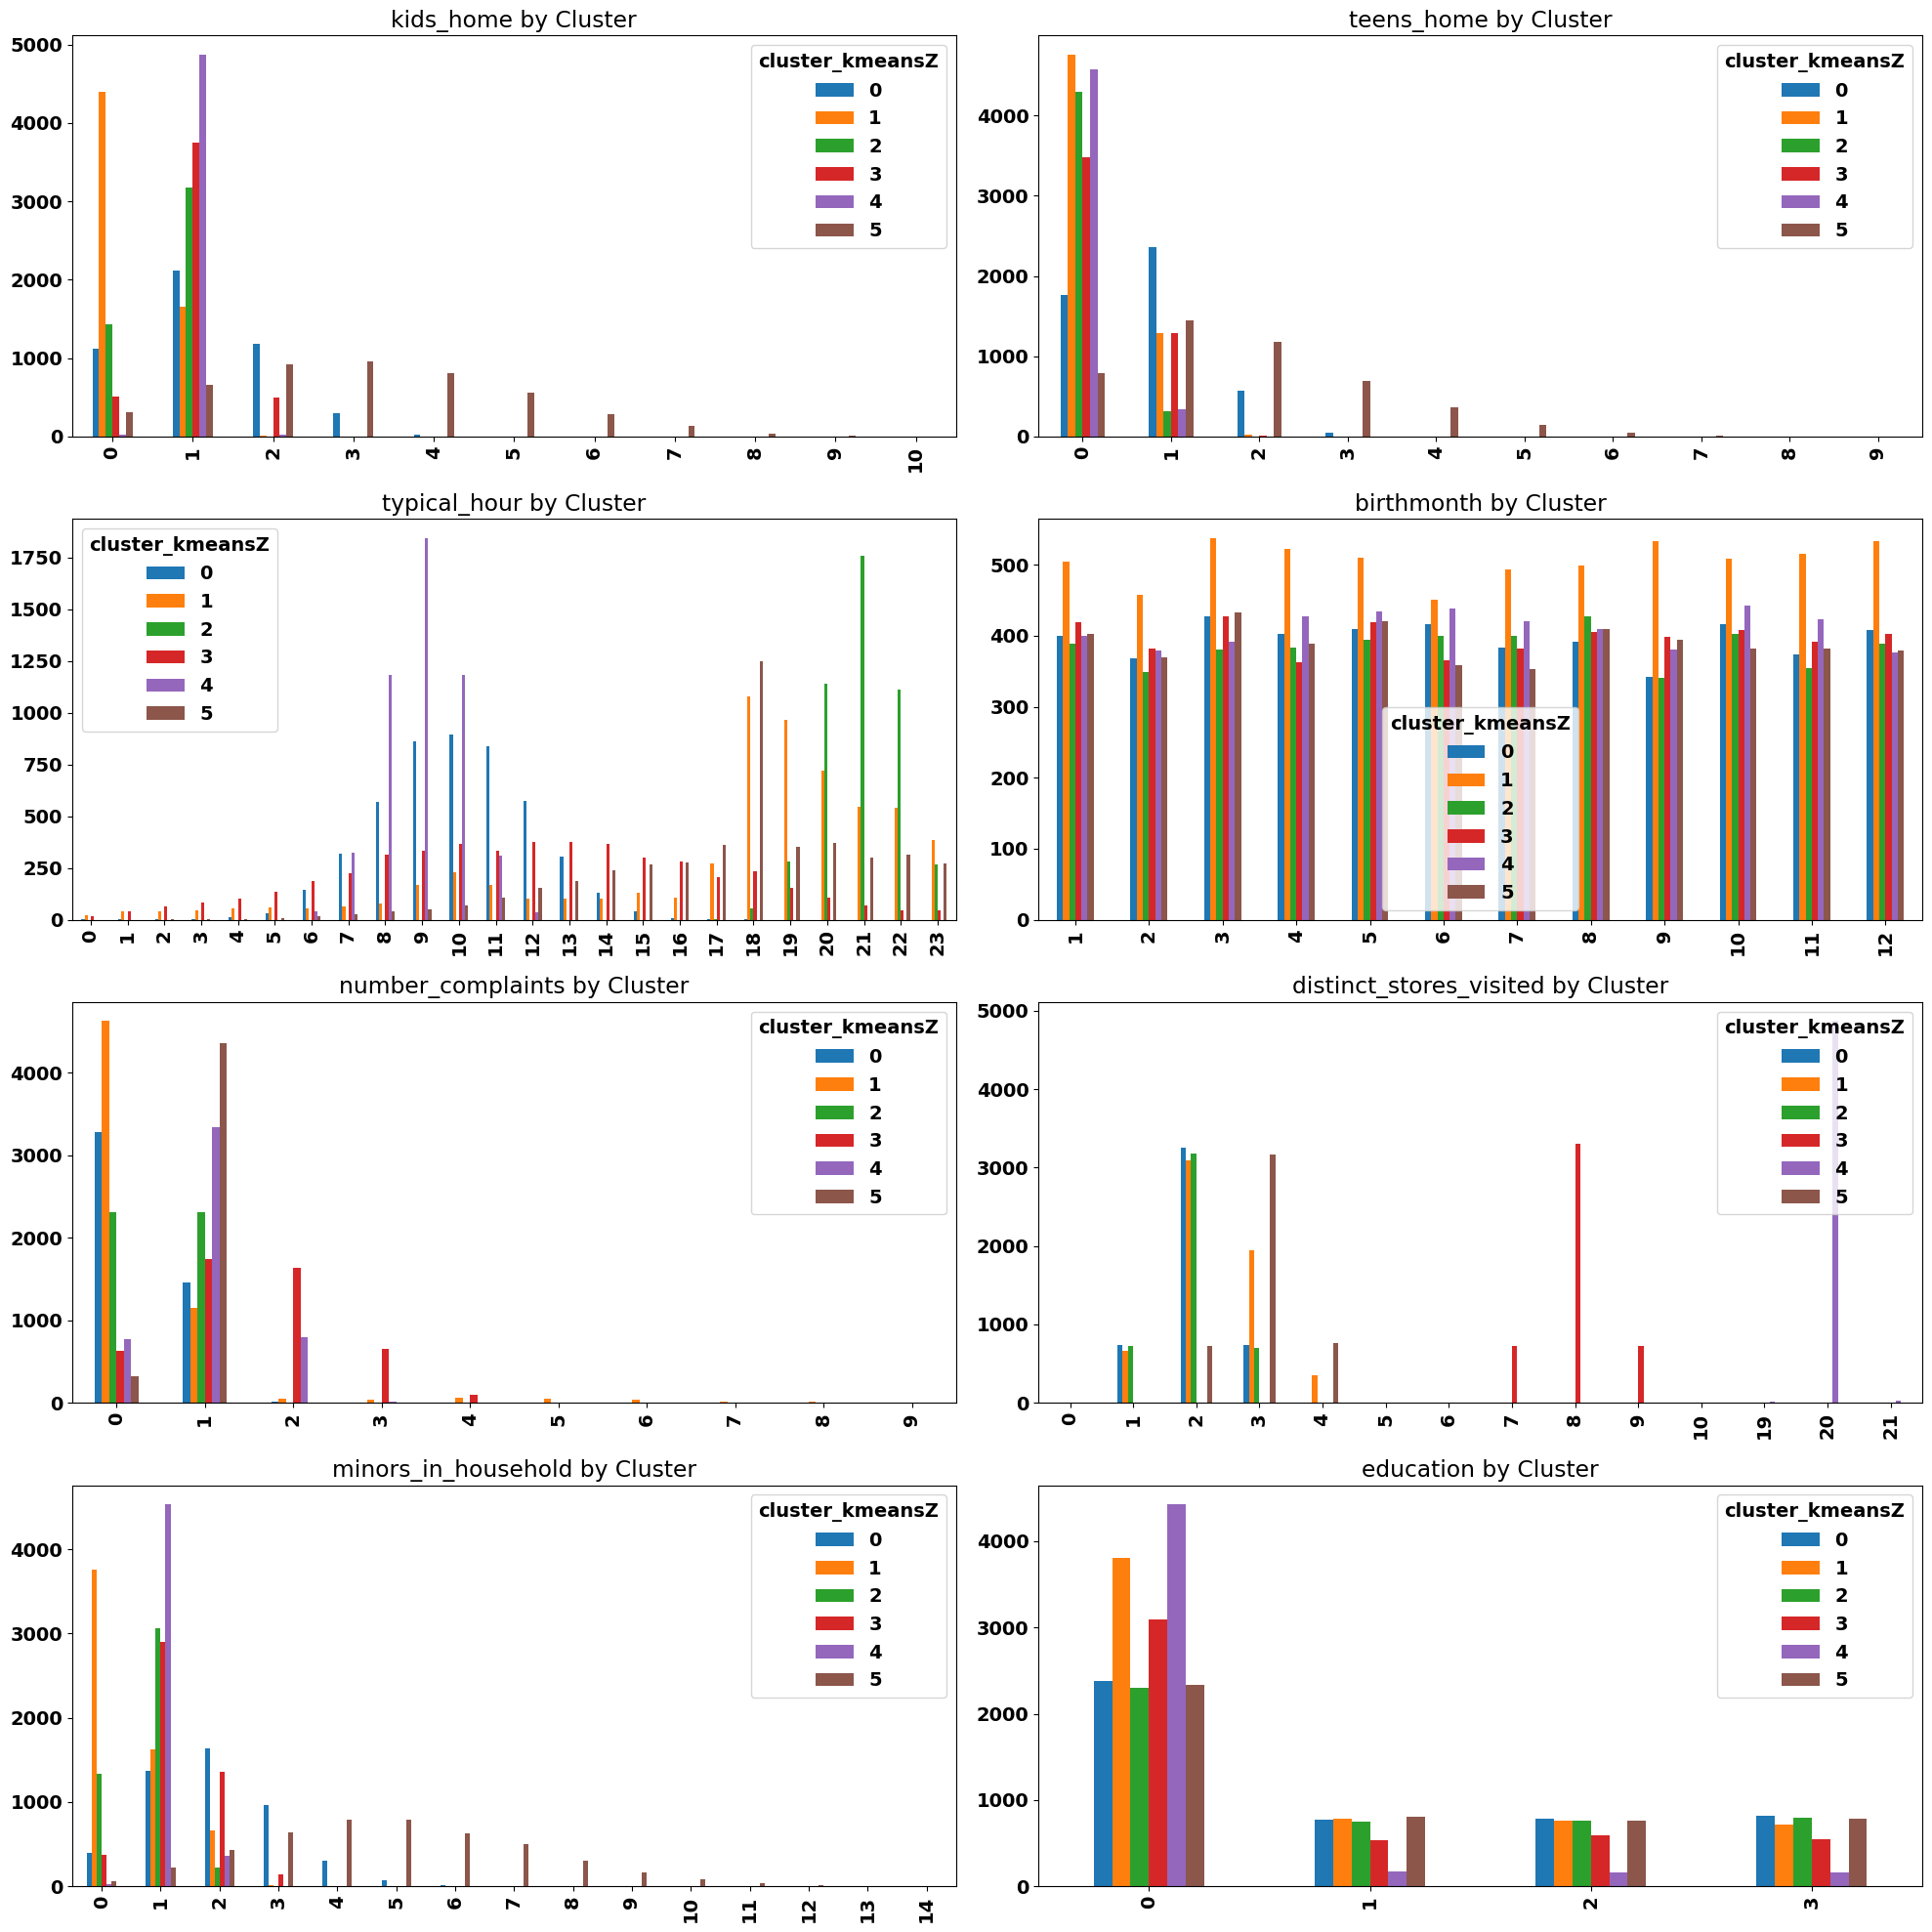

In [29]:
#HELP!!! PRECISO DE UMA ALTERNATIVA A ESTE PESSIMO GRAFICO
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

    # Flatten the axs array for easy indexing
axs = axs.flatten()

for i, column in enumerate(discrete):
    ax = axs[i]
    individuals.groupby(column)['cluster_kmeansZ'].value_counts().unstack().plot(kind='bar', ax=ax)
    ax.set_xlabel('')
    ax.set_title(column + ' by Cluster')

for i in range(len(axs)):
    if i >= len(discrete):
        axs[i].set_visible(False)

    # Adjust spacing between subplots
fig.tight_layout()

    # Show the plot
plt.show()

In [ ]:
sns.pairplot(individuals[columns], hue = "cluster_kmeansZ", kind = 'scatter', diag_kind = 'hist', corner = True, plot_kws = dict(alpha = 0.4), diag_kws=dict(fill=False), size = 3, palette = colors)

KeyError: "['cluster_kmeans1'] not in index"

### UMAP

In [30]:
# Matplotlib Options
plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

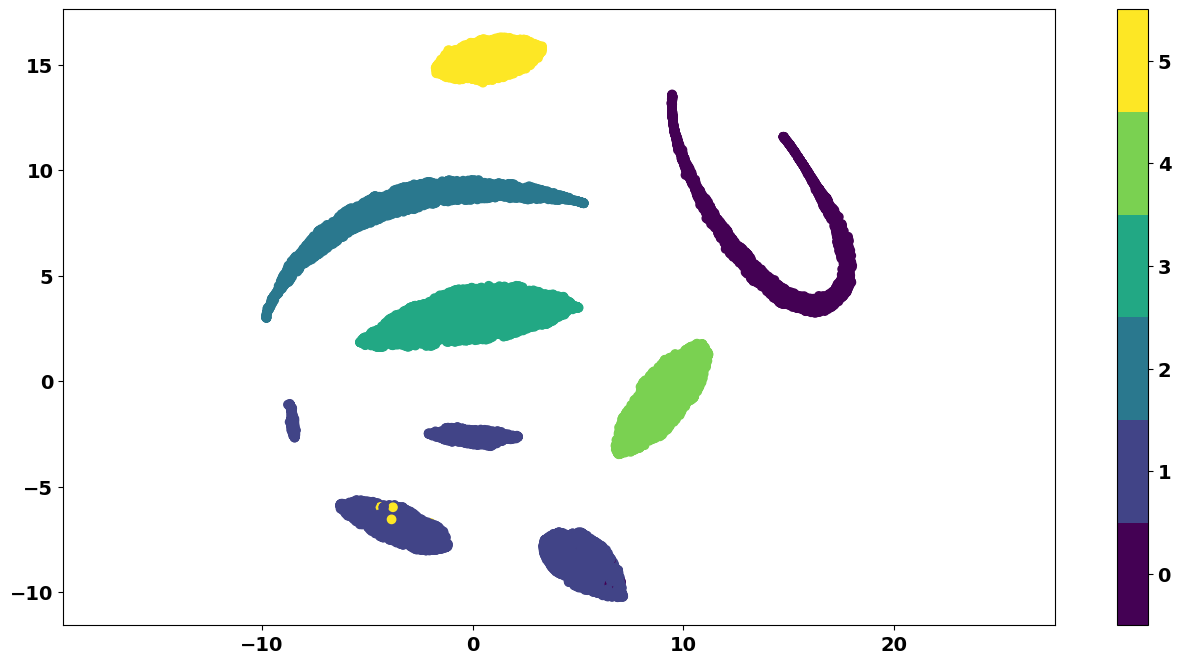

In [33]:
data_Z = individuals.drop(['cluster_kmeans3', 'customer_name', 'region'], axis=1)

# Assuming your k-means cluster solutions are stored in 'individuals'
labels_Z = individuals['cluster_kmeansZ'].values
reducer = umap.UMAP(random_state=42)
embedding_Z = reducer.fit_transform(data_Z)

plt.scatter(embedding_Z[:, 0], embedding_Z[:, 1], c=labels_Z, cmap='viridis')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
plt.show()

In [32]:
def visualize_dimensionality_reduction(transformation, targets):
  # create a scatter plot of the t-SNE output
  plt.scatter(transformation[:, 0], transformation[:, 1], 
              c=np.array(targets).astype(int), cmap=plt.cm.tab10)

  labels = np.unique(targets)

  # create a legend with the class labels and colors
  handles = [plt.scatter([],[], c=plt.cm.tab10(i), label=label) for i, label in enumerate(labels)]
  plt.legend(handles=handles, title='Classes')

  plt.show()

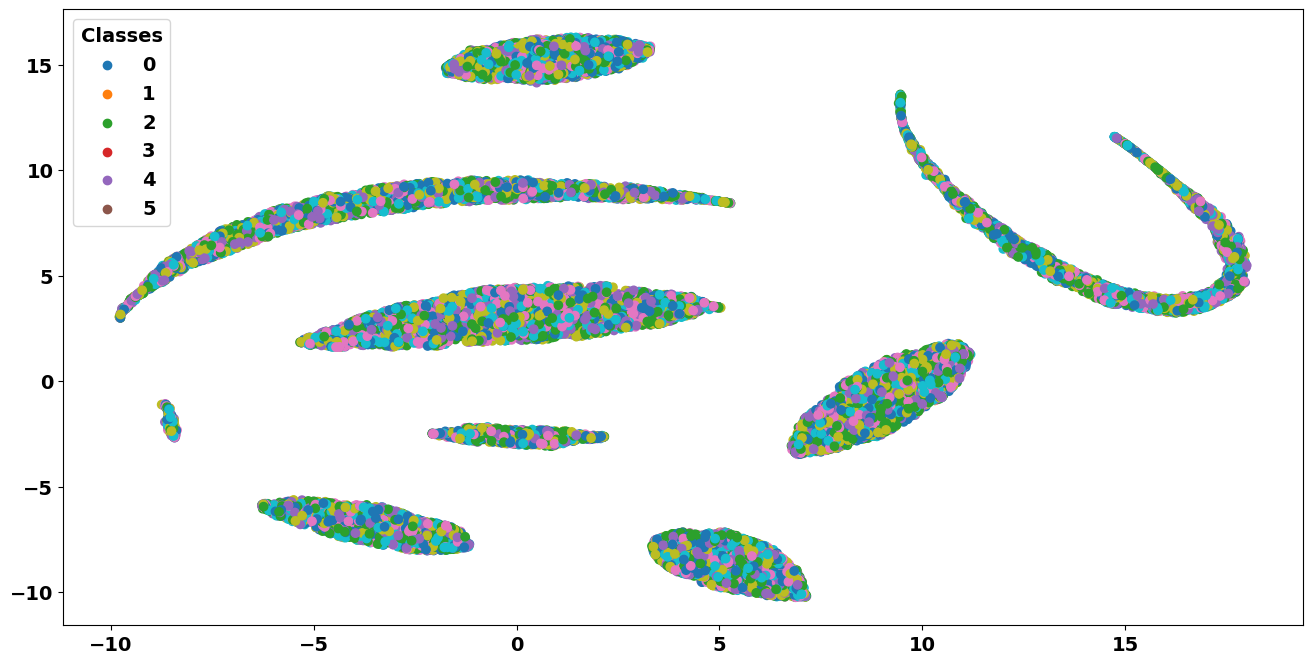

In [35]:
visualize_dimensionality_reduction(embedding_Z, individuals['cluster_kmeansZ'].sort_index())

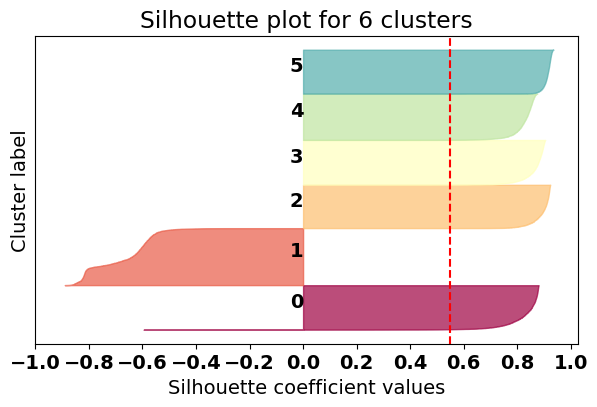

Silhouette score for 6 clusters: 0.5486


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Access the cluster labels from your dataset
cluster_labels = individuals['cluster_kmeansZ']

# Specify the number of clusters
n_clusters = 6

# Calculate silhouette score for the clustering solution
silhouette_avg = silhouette_score(data_Z, cluster_labels)

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(data_Z, cluster_labels)

# Plot silhouette visualization
fig, ax = plt.subplots()
fig.set_size_inches(7, 4)

y_lower = 10
for i in range(n_clusters):
    # Aggregate silhouette scores for samples in the current cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    # Sort the silhouette scores in descending order
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Color the clusters
    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label each cluster silhouette plot with the cluster number
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# The vertical line for average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])
ax.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_title("Silhouette plot for {} clusters".format(n_clusters))

plt.show()

# Print the silhouette score
print("Silhouette score for {} clusters: {:.4f}".format(n_clusters, silhouette_avg))


#### Confusion Matrices (ainda sem posição no indice)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
pd.DataFrame(
    confusion_matrix(individuals.cluster_kmeans3, individuals.cluster_kmeansZ),
    index = ['K-Means 3rd Solution {} Cluster'.format(i) for i in np.arange(0,6)],
    columns = ['K-Means Z Solution {} Cluster'.format(i) for i in np.arange(0,6)],
)

,K-Means Z Solution 0 Cluster,K-Means Z Solution 1 Cluster,K-Means Z Solution 2 Cluster,K-Means Z Solution 3 Cluster,K-Means Z Solution 4 Cluster,K-Means Z Solution 5 Cluster
K-Means 3rd Solution 0 Cluster,0,0,0,1906,0,3267
K-Means 3rd Solution 1 Cluster,4731,9,0,0,0,0
K-Means 3rd Solution 2 Cluster,0,0,4610,0,0,0
K-Means 3rd Solution 3 Cluster,0,450,0,2858,0,1406
K-Means 3rd Solution 4 Cluster,9,5607,0,0,0,0
K-Means 3rd Solution 5 Cluster,0,0,0,0,4921,0


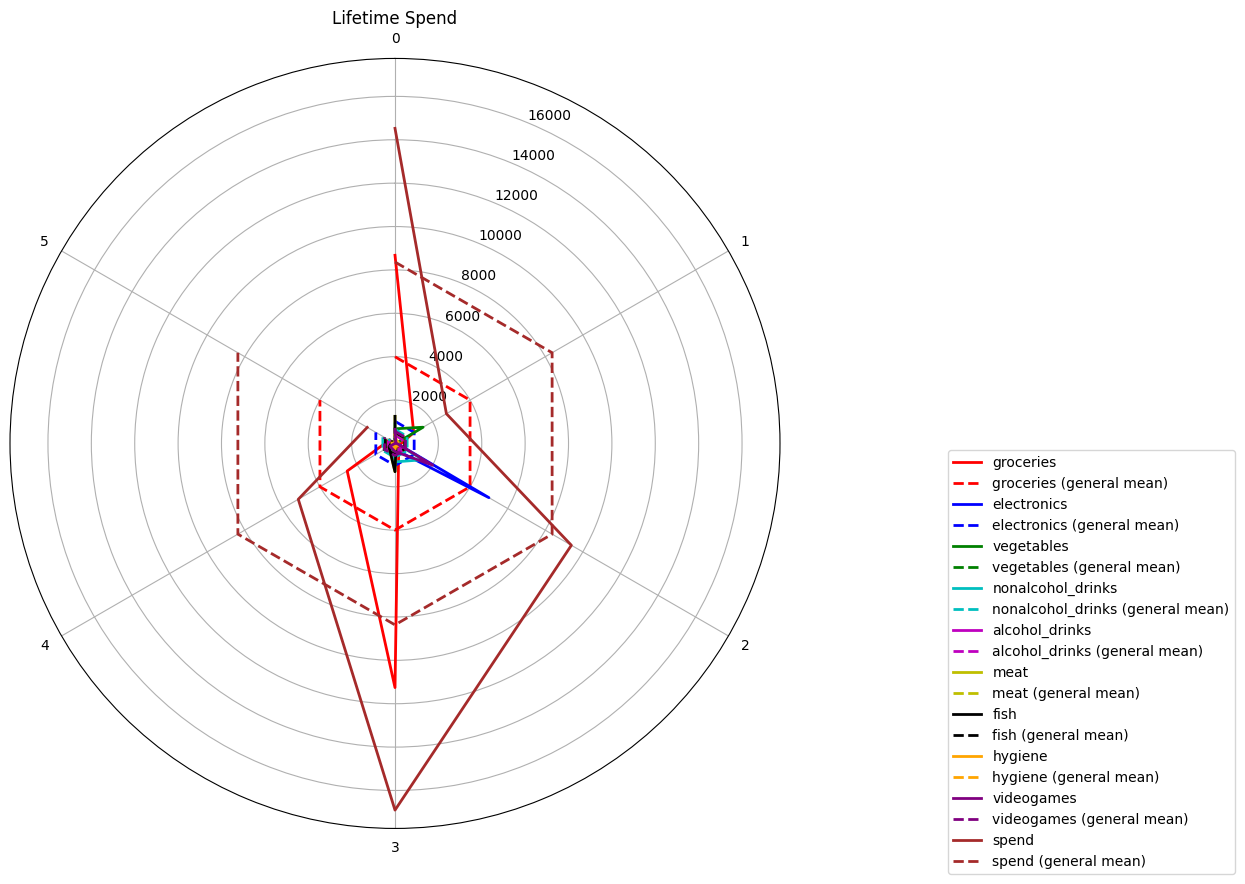

In [ ]:
#ATENÇÃO, PARTE DO CÓDIGO É DO CHATGPT

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,10))

# Define column names
columns = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene', 'lifetime_spend_videogames', 'total_lifetime_spend']

# Define colors for each variable
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

for i, column in enumerate(columns):
    filter_data = individuals.groupby('cluster_kmeans3', as_index=False)[column].mean()
    color = colors[i % len(colors)]  # Get color for variable
    ax.plot(np.linspace(0, 2*np.pi, len(filter_data['cluster_kmeans3']), endpoint=False), 
          filter_data[column], color=color, linewidth=2)
    ax.plot(np.linspace(0, 2*np.pi, len(filter_data['cluster_kmeans3']), endpoint=False), 
    np.full_like(np.linspace(0, 2*np.pi, len(filter_data['cluster_kmeans3']), endpoint=False), filter_data[column].mean()) ,'--', color=color, linewidth=2)

# Set Theta to North
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Modify legend labels
legend_labels = []
for col in columns:
    legend_labels.append(col[15:])
    legend_labels.append(col[15:] + ' (general mean)')
plt.legend(legend_labels, bbox_to_anchor=(1.6, 0.5))

# Set X Ticks and title
ax.set_xticks(np.linspace(0, 2*np.pi, len(filter_data['cluster_kmeans3']), endpoint=False))
ax.set_xticklabels(filter_data['cluster_kmeans3'])
ax.set_title('Lifetime Spend')

#ax.set_rlim(0, 500)

plt.show()

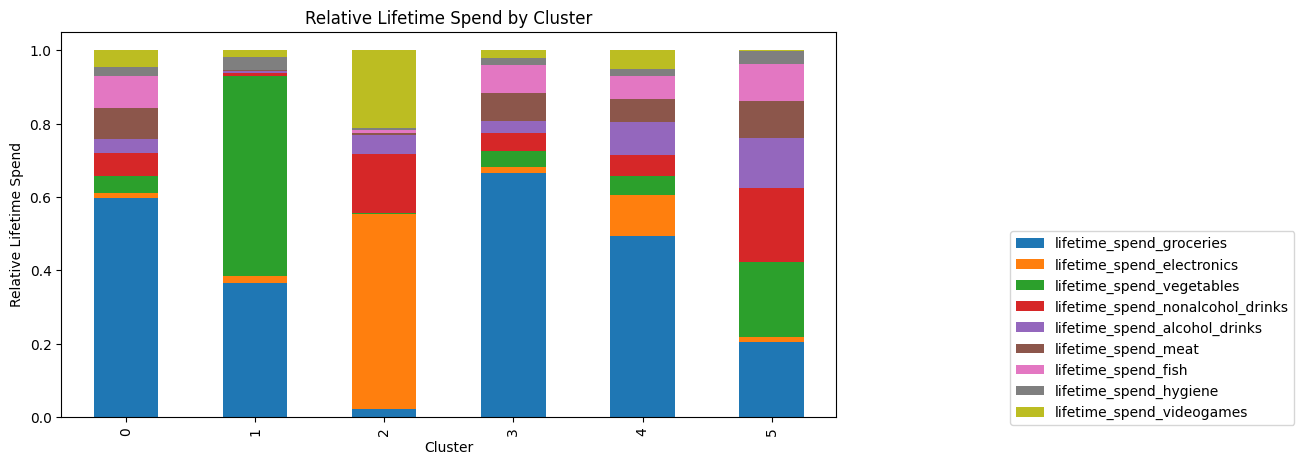

In [ ]:
#CHAT GPT
fig, axs = plt.subplots(1, 1, figsize=(10, 5), sharey=True)

columns2 = ['lifetime_spend_groceries', 'lifetime_spend_electronics', 'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene', 'lifetime_spend_videogames']

# Group the data by cluster and compute the mean of each category
data = individuals.groupby('cluster_kmeans3')[columns2].mean()

# Normalize the data by dividing each value in a row by the total value of that row
data = data.div(data.sum(axis=1), axis=0)

# Plot the relative stacked bar chart
data.plot(kind='bar', stacked=True, ax=axs)

# Add labels and titles
axs.set_xlabel('Cluster')
axs.set_ylabel('Relative Lifetime Spend')
axs.set_title('Relative Lifetime Spend by Cluster')
plt.legend(loc='upper right',bbox_to_anchor=(1.6, 0.5))
plt.show()

In [21]:
supermarkets = pd.read_csv('supermarkets preprocessed.csv')

In [23]:
supermarkets['cluster_kmeansZ'] = 6
supermarkets['cluster_kmeans3'] = 6
supermarkets.set_index('customer_id', inplace=True)
customers = pd.concat([individuals, supermarkets], axis=0)
customers.to_csv('customers_clustered.csv', index=True)

In [53]:
columns_to_drop = ['cluster_kmeans3', 'customer_name', 'region']
data_Z = individuals.drop(['cluster_kmeans3', 'customer_name', 'region'], axis=1)

# Assuming your k-means cluster solutions are stored in 'individuals'
labels_Z = individuals['cluster_kmeansZ'].values

In [54]:
reducer = umap.UMAP()
embedding_Z = reducer.fit_transform(data_Z)

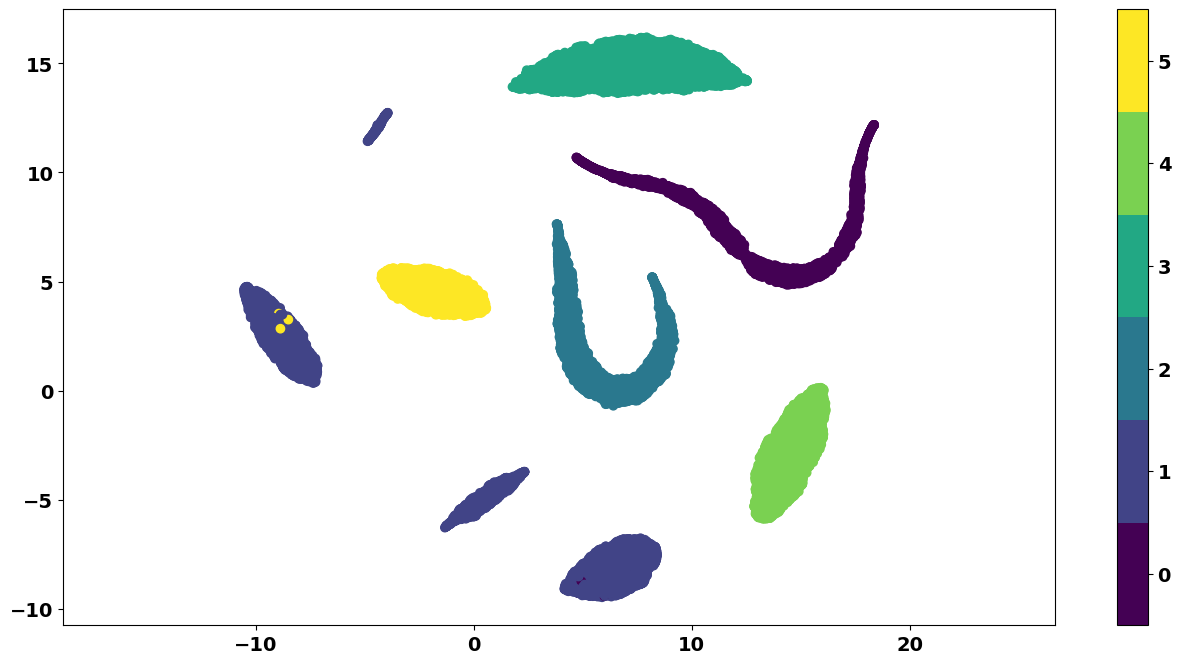

In [55]:
plt.scatter(embedding_Z[:, 0], embedding_Z[:, 1], c=labels_Z, cmap='viridis')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
plt.show()

In [56]:
data_3 = individuals.drop(columns_to_drop, axis=1)

# Assuming your k-means cluster solutions are stored in 'individuals'
labels_3 = individuals['cluster_kmeans3'].values

In [57]:
embedding_3 = reducer.fit_transform(data_3)

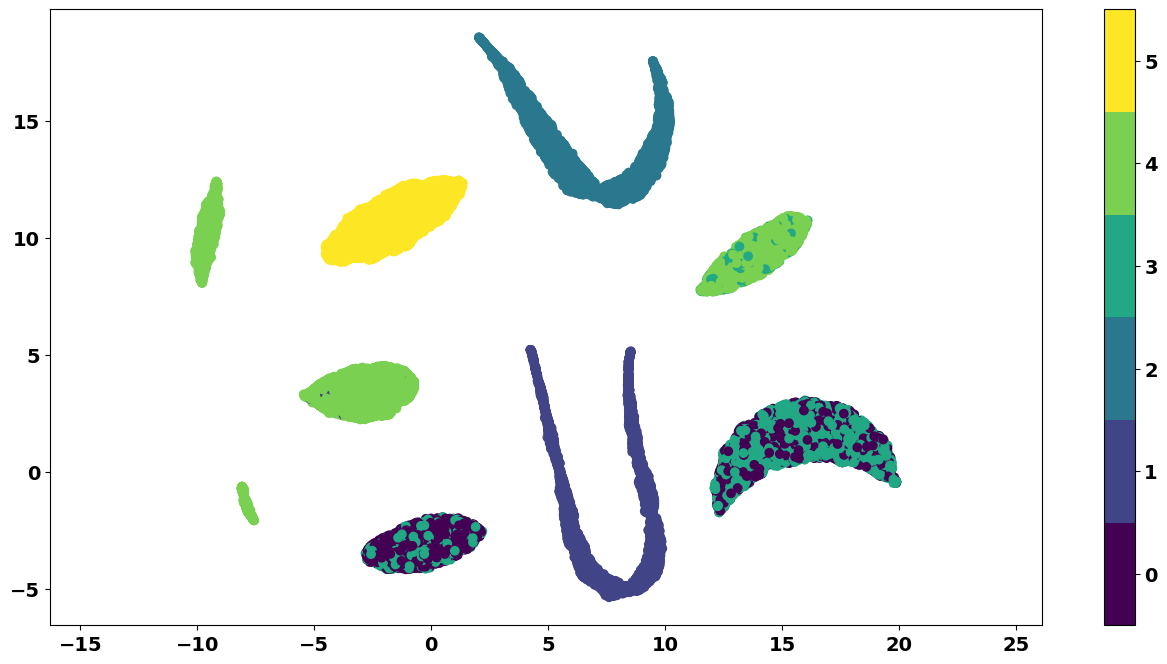

In [60]:
plt.scatter(embedding_3[:, 0], embedding_3[:, 1], c=labels_3, cmap='viridis')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
plt.show()